<a href="https://colab.research.google.com/github/Rtniewi/kcwiertniewicz-IDS/blob/main/AI/HW7/NASA_Asteroid_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Katrina Cwiertniewicz
### CSC362
### 4/22/2024
### Assignment 7: The purpose of this assignment is to create an MLP Classifier that can, as accurately as possible, classify an asteroid as Hazardous or Non-Hazardous.


##**Extract Training and Test Sets from the NASA Asteroid Dataset**

In [160]:
# Load the dataset
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Rtniewi/kcwiertniewicz-IDS/main/nasa_asteroid.csv')

# increase max columns
from google.colab.data_table import DataTable
DataTable.max_columns = 40

import warnings
warnings.filterwarnings('ignore')

data

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


## Hidden Layer Size 2 with 40 and 50 neurons respectively. This one was chosen because it is one of the classifiers with a minimum number of hidden layers that still classify the dataset at 84% accuracy.

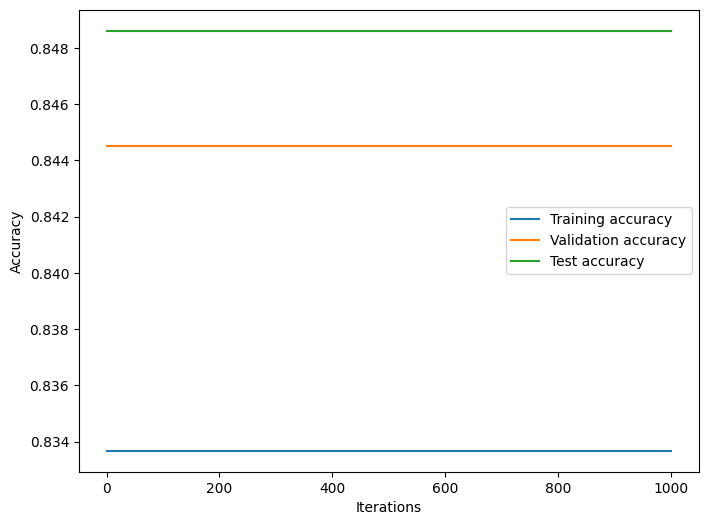

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Represent the Asteroid dataset and remove non-relevant features
X = data.drop(['Close Approach Date','Epoch Date Close Approach','Orbiting Body','Orbit ID','Orbit Determination Date','Equinox'], axis=1)
y = data['Hazardous']

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(40,50), max_iter=1000)

# Scale the numeric features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **The Loss Curve of the NASA Asteroid Classification**



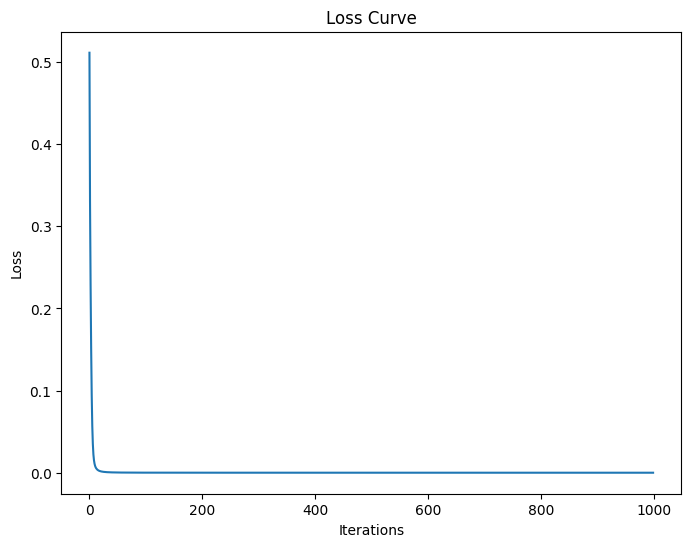

In [162]:
#@title The loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()



### The loss curve retains a 0.0 loss after 1000 iterations.




In [163]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

Layer 0 - Weight matrix shape: (34, 40)
Layer 1 - Weight matrix shape: (40, 50)
Layer 2 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (40,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (1,)


In [164]:
#@title The overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.8336720867208672
Overall Test Accuracy: 0.8486140724946695


### Overall Training Accuracy: 0.83

### Overall Test Accuracy: 0.85




# **Confusion Matrix**

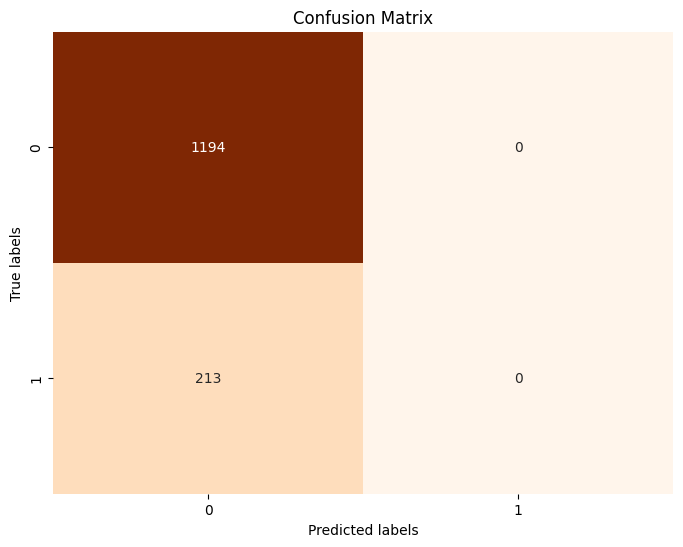

In [166]:
#@title The confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#**Hyperparameter Results**


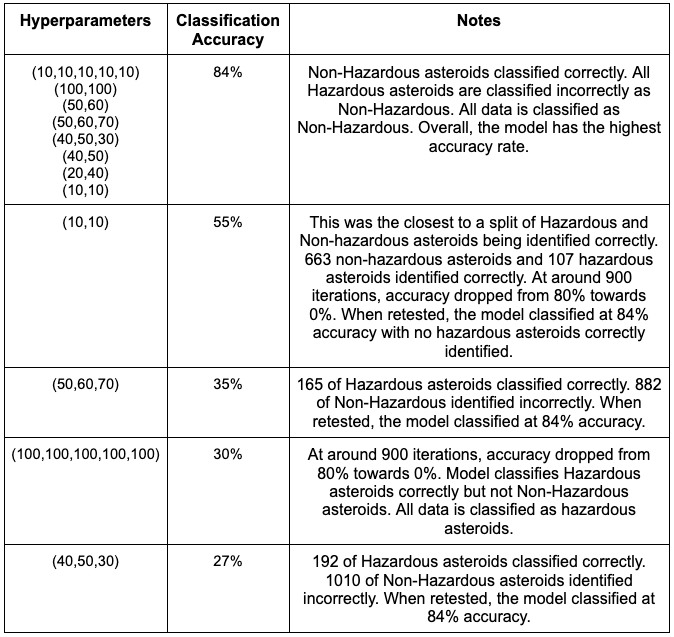



# **Closing Remarks**

### After testing different hyperparameters, the highest classification accuracy was 84%. This was when all points were labeled non-hazardous because the majority of the asteroids were non-hazardous. The hazardous points were all mislabeled as non-hazardous.

### To get the hazardous point to be correctly identified the accuracy was an average of 30%. This was because most hazardous asteroids were labeled hazardous but the majority of non-hazardous asteroids were labeled hazardous.

### From these experiments, it seems the hazardous and non-hazardous asteroid overlap in data. When hazardous was labeled correctly non-hazardous were labeled incorrectly and vice-versa. The graph seems to be underfitted, but from the tests of trying different hyperparameters, I was not able to get a high accuracy where both types of asteroids were correctly classified.
